# Assessment 2: Do bats perceive rats not just as competitors for food but also as potential predators?

# Data Cleaning

In [ ]:
import pandas as pd

# Load the first dataset
try:
    df1 = pd.read_csv('dataset1.csv')
    print("--- Info for dataset1.csv ---")
    df1.info()
    print("\n--- Head for dataset1.csv ---")
    print(df1.head())
except FileNotFoundError:
    print("Error: dataset1.csv not found.")

# Load the second dataset
try:
    df2 = pd.read_csv('dataset2.csv')
    print("\n\n--- Info for dataset2.csv ---")
    df2.info()
    print("\n--- Head for dataset2.csv ---")
    print(df2.head())
except FileNotFoundError:
    print("Error: dataset2.csv not found.")

--- Info for dataset1.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB

--- Head for data

In [ ]:
import pandas as pd

# Load dataset 1
df1 = pd.read_csv('dataset1.csv')

# --- Cleaning Dataset 1 ---

# Convert date/time columns to datetime objects
date_cols1 = ['start_time', 'rat_period_start', 'rat_period_end', 'sunset_time']
for col in date_cols1:
    df1[col] = pd.to_datetime(df1[col], format='%d/%m/%Y %H:%M')

# Handle missing values in 'habit' column by filling with mode
mode_habit = df1['habit'].mode()[0]
df1['habit'].fillna(mode_habit, inplace=True)

# Remove duplicate rows
df1.drop_duplicates(inplace=True)

# Save the cleaned dataset to a new CSV file
df1.to_csv('cleaned_dataset1.csv', index=False)
print("Cleaned dataset1.csv saved.")
print(f"Original size of dataset1: {len(pd.read_csv('dataset1.csv'))} rows")
print(f"New size of dataset1 after cleaning: {len(df1)} rows")


# Load dataset 2
df2 = pd.read_csv('dataset2.csv')

# --- Cleaning Dataset 2 ---

# Convert 'time' column to datetime object
df2['time'] = pd.to_datetime(df2['time'], format='%d/%m/%Y %H:%M')

# Remove duplicate rows
df2.drop_duplicates(inplace=True)

# Save the cleaned dataset to a new CSV file
df2.to_csv('cleaned_dataset2.csv', index=False)
print("\nCleaned dataset2.csv saved.")
print(f"Original size of dataset2: {len(pd.read_csv('dataset2.csv'))} rows")
print(f"New size of dataset2 after cleaning: {len(df2)} rows")

Cleaned dataset1.csv saved.
Original size of dataset1: 907 rows
New size of dataset1 after cleaning: 906 rows

Cleaned dataset2.csv saved.
Original size of dataset2: 2123 rows
New size of dataset2 after cleaning: 2123 rows


C:\Users\Nitro-5\AppData\Local\Temp\ipykernel_25244\742648267.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['habit'].fillna(mode_habit, inplace=True)


# Descriptive Analysis

In [ ]:
import pandas as pd

# Load the datasets
try:
    df1 = pd.read_csv('cleaned_dataset1.csv')
    df2 = pd.read_csv('cleaned_dataset2.csv')

    # Display initial info about the dataframes
    print('--- Info for cleaned_dataset1.csv ---')
    print(df1.info())
    print('\n--- Head of cleaned_dataset1.csv ---')
    print(df1.head())

    print('\n--- Info for cleaned_dataset2.csv ---')
    print(df2.info())
    print('\n--- Head of cleaned_dataset2.csv ---')
    print(df2.head())

except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file path and name.")

--- Info for cleaned_dataset1.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 906 non-null    object 
 1   bat_landing_to_food        906 non-null    float64
 2   habit                      906 non-null    object 
 3   rat_period_start           906 non-null    object 
 4   rat_period_end             906 non-null    object 
 5   seconds_after_rat_arrival  906 non-null    int64  
 6   risk                       906 non-null    int64  
 7   reward                     906 non-null    int64  
 8   month                      906 non-null    int64  
 9   sunset_time                906 non-null    object 
 10  hours_after_sunset         906 non-null    float64
 11  season                     906 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.1+ KB
None

--- 

Mean risk and reward per habit:
                                                   risk  reward
habit                                                         
157.0,2.6,349.0,159.3; 572.1,275.7,638.3,360.0     0.0     0.0
187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3    0.0     0.0
218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0   0.0     0.0
243.6,235.6,432.2,329.8; 559.0,244.0,622.0,395.0   0.0     0.0
245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5      0.0     0.0
...                                                ...     ...
rat_bat_fight                                      1.0     0.0
rat_disappear                                      1.0     0.0
rat_pick                                           1.0     1.0
rat_pick_and_bat                                   1.0     1.0
rat_to_bat                                         1.0     0.0

[81 rows x 2 columns]

Proportion of risky landings per habit:
 risk                                                0    1
habit                   

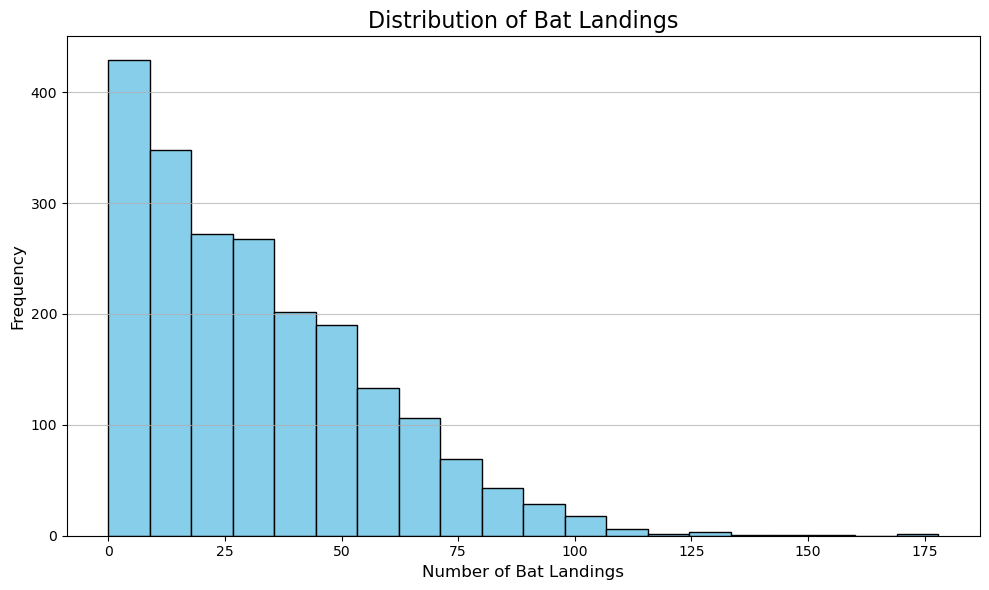

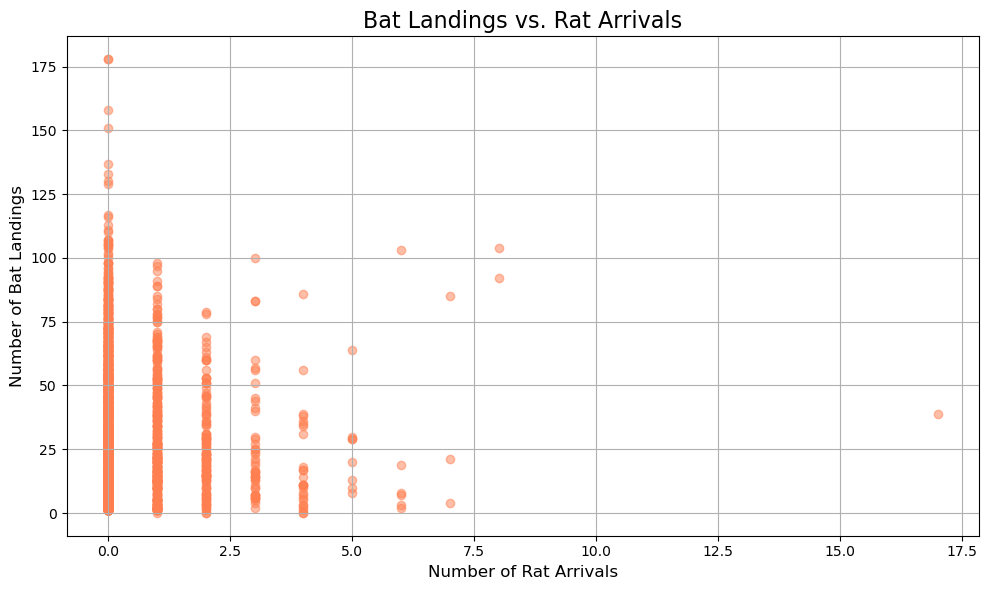

In [ ]:
# Re-load the dataframes
df1 = pd.read_csv('cleaned_dataset1.csv')
df2 = pd.read_csv('cleaned_dataset2.csv')

# --- Analysis of cleaned_dataset1.csv ---

# Group by 'habit' and calculate mean risk and reward
habit_analysis = df1.groupby('habit')[['risk', 'reward']].mean()
print("Mean risk and reward per habit:\n", habit_analysis)

# Calculate the proportion of risky landings for each habit
risky_landings_by_habit = df1.groupby('habit')['risk'].value_counts(normalize=True).unstack(fill_value=0)
print("\nProportion of risky landings per habit:\n", risky_landings_by_habit)

# Distribution of seconds_after_rat_arrival for 'rat' habit
rat_habit_seconds = df1[df1['habit'] == 'rat']['seconds_after_rat_arrival'].describe()
print("\nDescriptive statistics for 'seconds_after_rat_arrival' for 'rat' habit:\n", rat_habit_seconds)

# --- Analysis of cleaned_dataset2.csv ---

# Calculate correlation between bat_landing_number and rat_arrival_number
correlation_df2 = df2[['bat_landing_number', 'rat_arrival_number']].corr()
print("\nCorrelation matrix for bat and rat arrivals:\n", correlation_df2)

# Compare average bat landings when rats are present vs. not present
avg_landings_with_rats = df2[df2['rat_arrival_number'] > 0]['bat_landing_number'].mean()
avg_landings_without_rats = df2[df2['rat_arrival_number'] == 0]['bat_landing_number'].mean()
print(f"\nAverage bat landings when rats are present: {avg_landings_with_rats}")
print(f"Average bat landings when rats are not present: {avg_landings_without_rats}")

# Create and save a histogram for bat_landing_number
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df2['bat_landing_number'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Bat Landings', fontsize=16)
plt.xlabel('Number of Bat Landings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('distribution_of_bat_landings.png')

# Create and save a scatter plot of bat_landing_number vs. rat_arrival_number
plt.figure(figsize=(10, 6))
plt.scatter(df2['rat_arrival_number'], df2['bat_landing_number'], alpha=0.5, color='coral')
plt.title('Bat Landings vs. Rat Arrivals', fontsize=16)
plt.xlabel('Number of Rat Arrivals', fontsize=12)
plt.ylabel('Number of Bat Landings', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('bat_landings_vs_rat_arrivals.png')

Bats do indeed perceive rats as a direct threat beyond simple competition for resources.

# Inferential Analysis

Contingency Table (Involves Rat vs. Risk):
 risk            0    1
involves_rat          
0             458  137
1               0  311

Chi-squared Test for 'involves_rat' and 'risk':
Chi-square statistic: 481.0523
P-value: 0.0000

Shapiro-Wilk test for bat landings with rats: p-value = 0.0000
Shapiro-Wilk test for bat landings without rats: p-value = 0.0000
Levene's test for equality of variances: p-value = 0.0000

Mann-Whitney U test (one-tailed) for bat landings with vs. without rats:
U statistic: 378146.0000
P-value: 0.0000


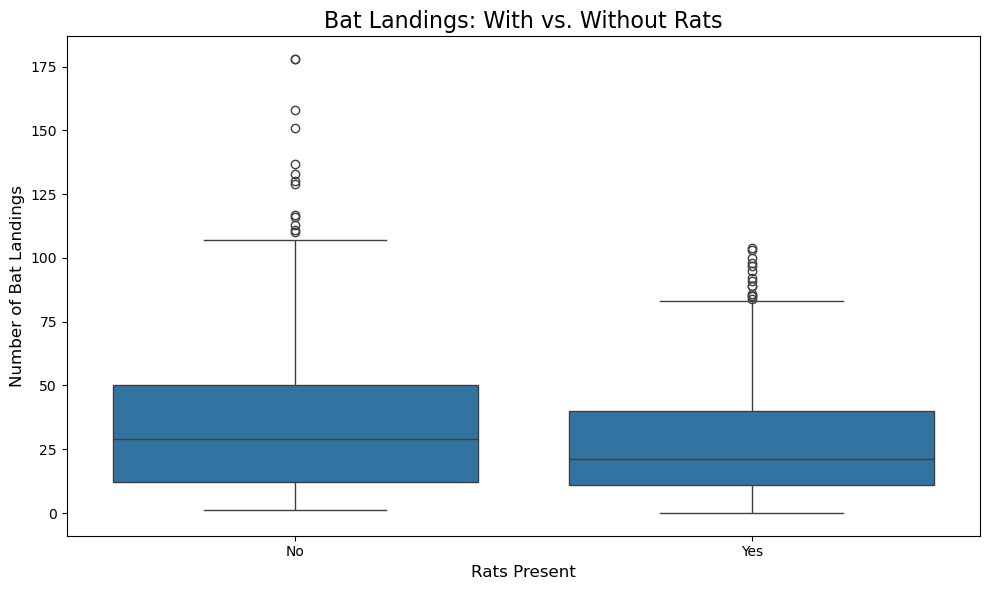

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu, shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_csv('cleaned_dataset1.csv')
df2 = pd.read_csv('cleaned_dataset2.csv')

# --- Inferential Analysis on cleaned_dataset1.csv (Risk vs. Rat Presence) ---

# Create a new column to indicate if the habit involves a rat
df1['involves_rat'] = df1['habit'].str.contains('rat', case=False, na=False).astype(int)

# Create a contingency table for Chi-squared test
contingency_table = pd.crosstab(df1['involves_rat'], df1['risk'])
print("Contingency Table (Involves Rat vs. Risk):\n", contingency_table)

# Perform Chi-squared test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Test for 'involves_rat' and 'risk':")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_val:.4f}")

# --- Inferential Analysis on cleaned_dataset2.csv (Bat Landings with/without Rats) ---

# Separate the data into two groups: with rats and without rats
bat_landings_with_rats = df2[df2['rat_arrival_number'] > 0]['bat_landing_number']
bat_landings_without_rats = df2[df2['rat_arrival_number'] == 0]['bat_landing_number']

# Check for normality using Shapiro-Wilk test
shapiro_with_rats = shapiro(bat_landings_with_rats)
shapiro_without_rats = shapiro(bat_landings_without_rats)
print(f"\nShapiro-Wilk test for bat landings with rats: p-value = {shapiro_with_rats.pvalue:.4f}")
print(f"Shapiro-Wilk test for bat landings without rats: p-value = {shapiro_without_rats.pvalue:.4f}")

# Check for equality of variances using Levene's test
levene_test = levene(bat_landings_with_rats, bat_landings_without_rats)
print(f"Levene's test for equality of variances: p-value = {levene_test.pvalue:.4f}")

# Since the data is not normally distributed, perform Mann-Whitney U test
mw_u_stat, mw_p_val = mannwhitneyu(bat_landings_with_rats, bat_landings_without_rats, alternative='less')
print(f"\nMann-Whitney U test (one-tailed) for bat landings with vs. without rats:")
print(f"U statistic: {mw_u_stat:.4f}")
print(f"P-value: {mw_p_val:.4f}")

# Create a boxplot to visualize the difference
plt.figure(figsize=(10, 6))
sns.boxplot(x='rat_present', y='bat_landing_number', data=df2.assign(rat_present=df2['rat_arrival_number'] > 0))
plt.title('Bat Landings: With vs. Without Rats', fontsize=16)
plt.xlabel('Rats Present', fontsize=12)
plt.ylabel('Number of Bat Landings', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.savefig('bat_landings_boxplot.png')

Rat-bat interactions as high-risk events and the significant reduction in bat activity when rats are present are behaviors more indicative of avoiding a predator than simply competing for a limited food source.